# Experiment Tutorial

In [1]:
from shrinkbench.experiment import PruningExperiment

The `DATAPATH` environment variable is used to tell the framework where to look for datasets.

In [2]:
import os
os.environ['DATAPATH'] = 'data'

In [3]:
from IPython.display import clear_output
clear_output()

In [4]:
import torchvision.datasets as datasets

In [5]:
import shrinkbench.models as models

In [6]:
hasattr(models, 'LeNet')

False

In [7]:
mnist = datasets.MNIST('data', download=True)

Using downloaded and verified file: data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/home/nrj006/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554786529/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


We run experiments for our MNIST network for logarithmically spaced compression ratios

In [8]:
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1,2,4,8,16,32,64]:
        exp = PruningExperiment(dataset='MNIST', 
                                model='MnistNet',
                                strategy=strategy,
                                compression=c,
                                train_kwargs={'epochs':10},
                                pretrained=False)
        exp.run()
        clear_output()

Found MNIST under /home/nrj006/Research/sota_prune/data/MNIST


RuntimeError: Dataset not found. You can use download=True to download it

We then collect output from experiment folders and plot the diferent metrics easily

In [19]:
from shrinkbench.plot import df_from_results, plot_df

In [20]:
df = df_from_results('results')

In [25]:
import matplotlib.pyplot as plt
import numpy as np

With the provided functions, it is easy to generate plots 

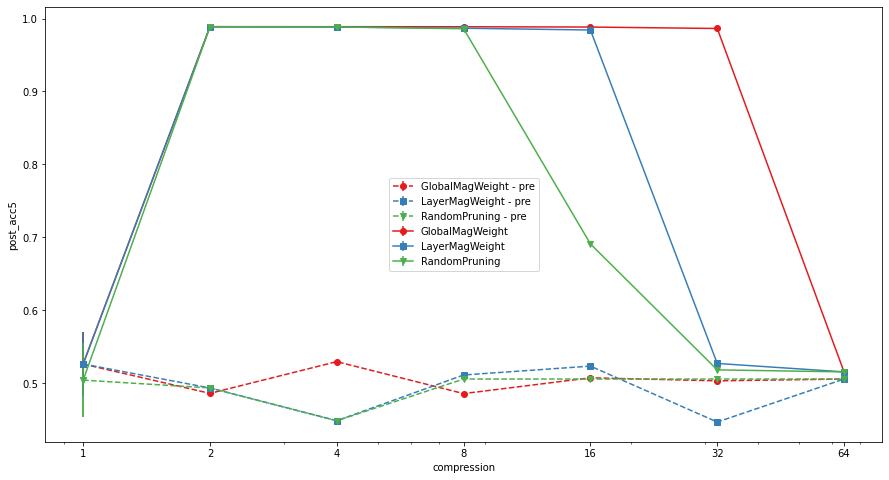

In [21]:
plot_df(df, 'compression', 'pre_acc5', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, 'compression', 'post_acc5', markers='strategy', fig=False, colors='strategy')

We can also check the theoretical speedup and see that layerwise provides larger FLOPS speedups because of the even pruning of the conv layers

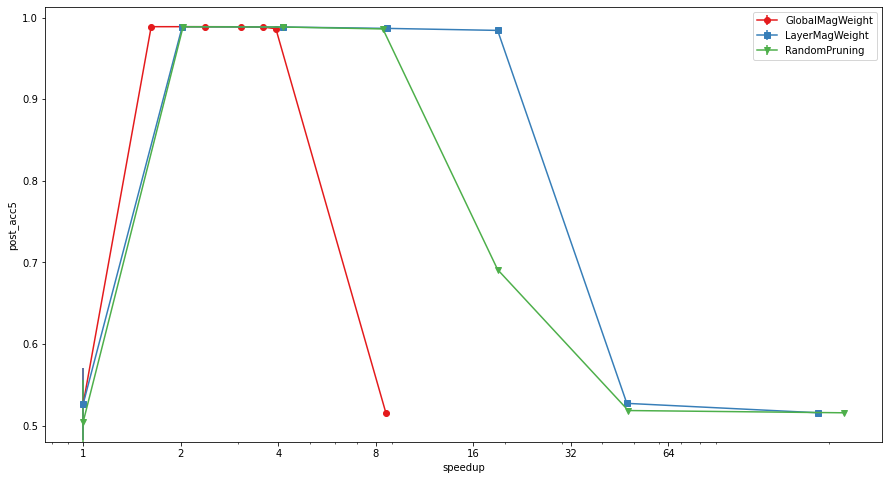

In [30]:
plot_df(df, 'speedup', 'post_acc5', colors='strategy', markers='strategy')
# plt.yscale('log')
#plt.ylim(0.996,0.9995)
plt.xticks(2**np.arange(7))
plt.gca().set_xticklabels(map(str, 2**np.arange(7)))
None

We can easily check if the compression is matching our expectation by looking at the relative error. As expected, random pruning does worst.

In [31]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']

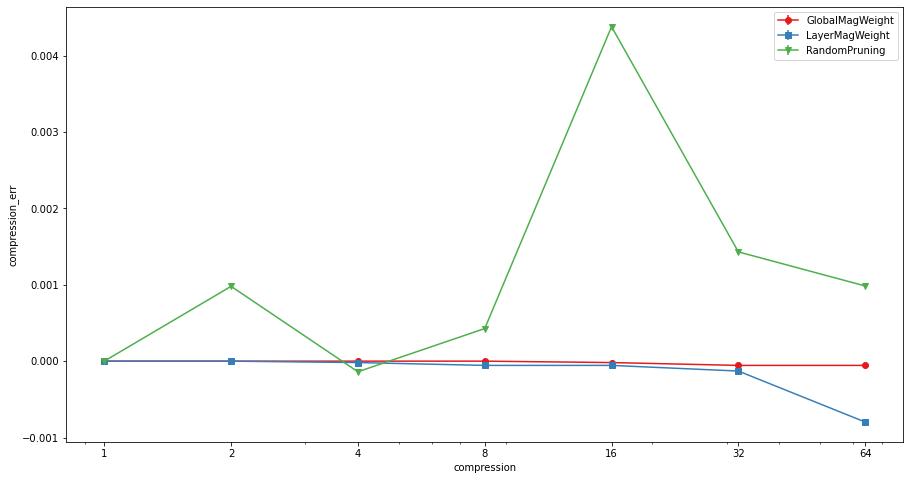

In [32]:
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')